In [193]:
from io import StringIO
import requests
import json
import pandas as pd
import numpy as np
from sklearn import preprocessing

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
data_chunks = pd.read_csv('historical_data1_time_Q12005.txt',low_memory=False,sep="|", nrows=250000)
data_chunks1 = pd.read_csv('historical_data1_time_Q22005.txt',low_memory=False,sep="|", nrows=250000)
#data_1 = pd.concat(data_chunks, ignore_index=True)
def compute_Matrix(data_chunks,data_chunks1):
    y_train = pd.DataFrame(data_chunks['new_delinq'])
    y_test = pd.DataFrame(data_chunks1['new_delinq'])
    x_train_raw = data_chunks
    x_train = preprocessing.minmax_scale(x_train_raw)
    y_train_raw = data_chunks1
    x_test = preprocessing.minmax_scale(y_train_raw)
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    y_train_estimated = logreg.predict(x_train)
    y_test_estimated = logreg.predict(x_test)
    conf_mat = metrics.confusion_matrix(y_test_estimated,y_test)
    print(conf_mat_logred)
    No_of_actual_delq = conf_mat[1][0] + conf_mat[1][1]
    No_of_pred_delq = conf_mat[0][1] + conf_mat[1][1]
    No_of_records = conf_mat[0][1] + conf_mat[1][1] + conf_mat[1][0] + conf_mat[0][0]
    No_of_delq_properly_classified = conf_mat[1][1]
    No_of_nonDelq_improperly_classified_as_delq = conf_mat[0][1]
    output = {'No_of_actual_delq':No_of_actual_delq,
           'No_of_pred_delq':No_of_pred_delq,
           'No_of_records':No_of_records,
           'No_of_delq_properly_classified':No_of_delq_properly_classified,
           'No_of_nonDelq_improperly_classified_as_delq':No_of_nonDelq_improperly_classified_as_delq}
    print(output) 


def clean_data(data_chunks):
    data_chunks.columns = ['id_loan','svcg_cycle','current_upb','delq_sts','loan_age','mths_remng',
                           'repch_flag','flag_mod', 'cd_zero_bal',
                           'dt_zero_bal','current_int_rt','non_int_brng_upb','dt_lst_pi','mi_recoveries',
                           'net_sale_proceeds','non_mi_recoveries','expenses', 'legal_costs',
                           'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss', 'modcost']

    for i, row in data_chunks.iterrows():
            data_chunks.set_value(i,'svcg_cycle',((int(str(row['svcg_cycle'])[:4]) - 1990)*12*30 + (int(str(row['svcg_cycle'])[4:6])*30)))

    data_chunks.delq_sts.replace('R', 1 , inplace = True)
    data_chunks.delq_sts.replace('XX', 1 , inplace = True)
    data_chunks.delq_sts = data_chunks.delq_sts.astype('float64')     


    data_chunks.repch_flag.replace(np.nan, 2 , inplace = True)
    data_chunks.repch_flag.replace('N', 0 , inplace = True)
    data_chunks.repch_flag.replace('Y', 1 , inplace = True)
    data_chunks.repch_flag = data_chunks.repch_flag.astype('float64')

    data_chunks.flag_mod.replace(np.nan,0,inplace = True)
    data_chunks.flag_mod.replace('Y',1,inplace = True)
    data_chunks.flag_mod = data_chunks.flag_mod.astype('float64')

    data_chunks.cd_zero_bal.replace(np.nan,0,inplace = True)
    data_chunks.cd_zero_bal = data_chunks.cd_zero_bal.astype('float64')

    data_chunks.dt_zero_bal.replace(np.nan,0,inplace = True)
    data_chunks.dt_zero_bal = data_chunks.dt_zero_bal.astype('int64')

    for i, row in data_chunks.iterrows():
        if (row['dt_zero_bal'] > 0):
            data_chunks.set_value(i,'dt_zero_bal',((int(str(row['dt_zero_bal'])[:4]) - 1990)*12*30 + (int(str(row['dt_zero_bal'])[4:6])*30)))

    data_chunks.dt_lst_pi.replace(np.nan,0,inplace = True)
    data_chunks.dt_lst_pi = data_chunks.dt_lst_pi.astype('int64')

    for i, row in data_chunks.iterrows():
        if (row['dt_lst_pi'] > 0):
            data_chunks.set_value(i,'dt_lst_pi',((int(str(row['dt_lst_pi'])[:4]) - 1990)*12*30 + (int(str(row['dt_lst_pi'])[4:6])*30)))

    data_chunks.mi_recoveries.replace(np.nan,0,inplace = True)	

    data_chunks.non_mi_recoveries.replace(np.nan, 0,inplace = True)

    data_chunks.net_sale_proceeds.replace(np.nan, 0,inplace = True)
    data_chunks.net_sale_proceeds.replace('C', 1, inplace = True)
    data_chunks.net_sale_proceeds.replace('U', 0, inplace = True)
    data_chunks.net_sale_proceeds = data_chunks.net_sale_proceeds.astype('float64')

    data_chunks.expenses.replace(np.nan, 0,inplace = True)
    data_chunks.legal_costs.replace(np.nan, 0,inplace = True)
    data_chunks.maint_pres_costs.replace(np.nan, 0,inplace = True)
    data_chunks.taxes_ins_costs.replace(np.nan, 0,inplace = True)
    data_chunks.misc_costs.replace(np.nan, 0,inplace = True)
    data_chunks.actual_loss.replace(np.nan, 0,inplace = True)
    data_chunks.modcost.replace(np.nan, 0,inplace = True)
    data_chunks['new_delinq'] = (data_chunks.delq_sts > 0.0).astype('float64')
    return data_chunks   



data_chunks = clean_data(data_chunks)
data_chunks1 = clean_data(data_chunks1)
compute_Matrix(data_chunks,data_chunks1)



/gpfs/fs01/user/sff7-58a84c67e1da6e-fa49d0174b0c/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[236054  10590]
 [  2686    670]]
{'No_of_records': 250000, 'No_of_actual_delq': 221, 'No_of_delq_properly_classified': 202, 'No_of_pred_delq': 11260, 'No_of_nonDelq_improperly_classified_as_delq': 11058}


In [163]:
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import logit,probit,poisson,ols
train_cols = data_chunks.columns[1]
#df1 = data_chunks.ix[0,3:5].copy()
df1 = data_chunks[[1,2,4,5,6,7,8,9,10,11,13,14,15,17,19,22]]
#df1.dtypes
#np.asarray(df1).dtypes
logit = sm.Logit(data_chunks['new_delinq'],df1)
pred_mod = logit.fit()
print(pred_mod.summary())

         Current function value: 0.148488
         Iterations: 35


/usr/local/src/conda3_runtime.v14/4.1.1/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:             new_delinq   No. Observations:               250000
Model:                          Logit   Df Residuals:                   249984
Method:                           MLE   Df Model:                           15
Date:                Thu, 20 Jul 2017   Pseudo R-squ.:                 0.07491
Time:                        16:40:47   Log-Likelihood:                -37122.
converged:                      False   LL-Null:                       -40128.
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
svcg_cycle           -0.0008      0.000     -6.159      0.000        -0.001    -0.001
current_upb        1.615e-06   1.52e-07     10.617      0.000      1.32e-06  1.91e-06
loan_age              0.

In [190]:
df_selected = data_chunks[['svcg_cycle','current_upb','loan_age','mths_remng','repch_flag','flag_mod','cd_zero_bal','dt_zero_bal','current_int_rt','non_int_brng_upb']]
df_selected1 = data_chunks1[['svcg_cycle','current_upb','loan_age','mths_remng','repch_flag','flag_mod','cd_zero_bal','dt_zero_bal','current_int_rt','non_int_brng_upb']]

x_train_raw = df_selected
x_train = preprocessing.minmax_scale(x_train_raw)
y_train_raw = df_selected1
x_test = preprocessing.minmax_scale(y_train_raw)

/gpfs/fs01/user/sff7-58a84c67e1da6e-fa49d0174b0c/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[238732  11047]
 [     8    213]]


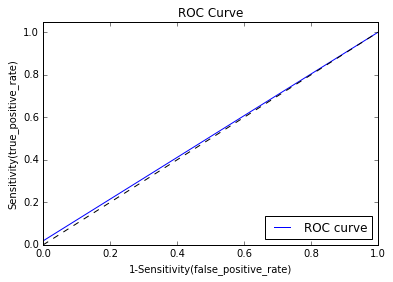

In [186]:
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib import pyplot as plt
# import matplotlib
# matplotlib.use('agg')
# import pylab as plt




fpr, tpr, _ = metrics.roc_curve(y_test, y_test_estimated)
    
plt.figure()
plt.plot(fpr,tpr,label = 'ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Sensitivity(false_positive_rate)')
plt.ylabel('Sensitivity(true_positive_rate)')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

/usr/local/src/conda3_runtime.v14/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[236054  10590]
 [  2686    670]]


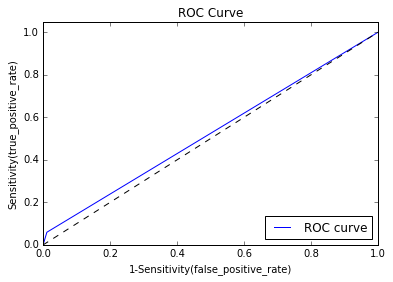

In [191]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

y_train_estimated = rf.predict(x_train)
y_test_estimated = rf.predict(x_test)

     
conf_mat_logred = metrics.confusion_matrix(y_test_estimated,y_test)
print(conf_mat_logred)

fpr, tpr, _ = metrics.roc_curve(y_test, y_test_estimated)
    
plt.figure()
plt.plot(fpr,tpr,label = 'ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Sensitivity(false_positive_rate)')
plt.ylabel('Sensitivity(true_positive_rate)')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

/gpfs/fs01/user/sff7-58a84c67e1da6e-fa49d0174b0c/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[238735  11025]
 [     5    235]]


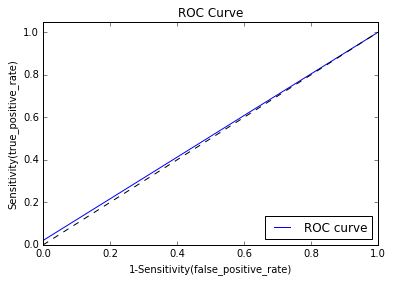

In [188]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()

nn.fit(x_train, y_train)

y_train_estimated = nn.predict(x_train)
y_test_estimated = nn.predict(x_test)

     
conf_mat_logred = metrics.confusion_matrix(y_test_estimated,y_test)
print(conf_mat_logred)

fpr, tpr, _ = metrics.roc_curve(y_test, y_test_estimated)
    
plt.figure()
plt.plot(fpr,tpr,label = 'ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Sensitivity(false_positive_rate)')
plt.ylabel('Sensitivity(true_positive_rate)')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()


    